# Lab Exersice 1
*Author: Jakob Heller, Steffen Steiner, Clemens Konrad Müller* 


## DFT and Windowing
## Exercise: Windowing of a harmonic signal

a) Generate two sine signals of  $f_1=200$ Hz and $f_2 = 200.25$ Hz and amplitude $|x[k]|_{max} = 1$
for the sampling rate $f_s = 800$ Hz in the range of $0 \le k < N = 1600$ .

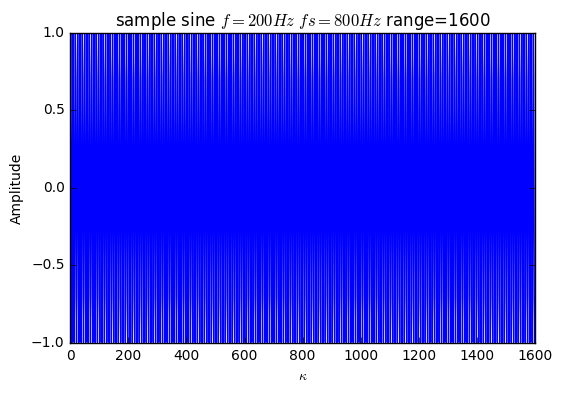

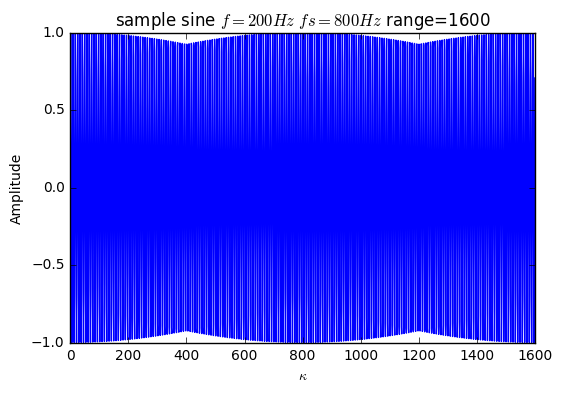

In [311]:
%matplotlib inline 
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# generate the 3 frequencies
f1=200 # Hz
f2=200.25 # Hz
fs=800 #Hz

# Range
N=1600 #int

#maximum amplitude
maxamp=1

#k=kappa the time domain index (array from 0 to Range in N/fs steps)
k = np.arange(N)

#create sines
y1 = maxamp * np.sin(2 * np.pi * f1 * k/(2*fs))
y2 = maxamp * np.sin(2 * np.pi * f2 * k/(2*fs))


plt.plot(k,y1)
plt.ylabel('Amplitude')
plt.xlabel('$\kappa$')
plt.title('sample sine $f=200Hz$ $fs=800Hz$ range=1600')
plt.figure()
plt.plot(k,y2)
plt.ylabel('Amplitude')
plt.xlabel('$\kappa$')
plt.title('sample sine $f=200Hz$ $fs=800Hz$ range=1600')

b) Generate a rectangular window, a Hanning window and a flat top window with the same length as the sine signals.

In [312]:
w_rect= np.ones(N) #rectangle windowfunction
w_hanning= np.hanning(N) #hanning window
w_flat_top=signal.flattop(N) #flat top window

c) Window both sine signals with the three windows and calculate the DFT spectra. <br />
d) Plot the absolute value of the DFT spectra in $dB$ as in fig. $1$, $2$ and $3$. Pay attention
to using the same normalisation: The DFT values apart from DC and $f_s/2$  have to be
normalised with $2/N$ before calculating the logarithm to achieve physically interpretable
spectra.

In [313]:
#we define a function for windowing and DFT spectra plotting
def window_and_dft(f,w):
    
    N = len(f)
    
    #window the function with the signal
    wf=f*w #wf=windowedfunction
    
    # DFT of window function 
    WF = np.fft.fft(wf, N) #WF in this notation we use Majuskels for spectre domain #The lenght of the DTFT is N
   
    #normalisation with  2/N
    WFlog = 20*np.log10( np.abs(WF)*(2/N))
    
    #mu index for spectre domain
    plt.plot(WFlog , 'bo-')
    plt.axis([175, 225, -100, 5])
    plt.ylabel(r'20*$log_{10}$(|A|*2/N) in dB')
    plt.xlabel(r'f/Hz')





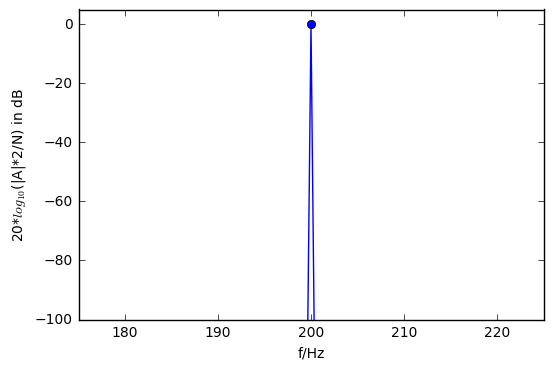

In [314]:
#window_and_dft all combinations of signals and windows
window_and_dft(y1,w_rect)

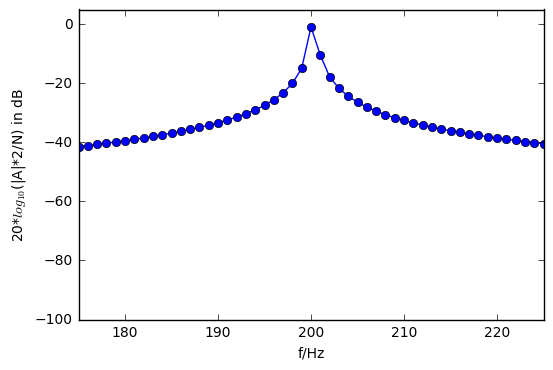

In [315]:
window_and_dft(y2,w_rect)

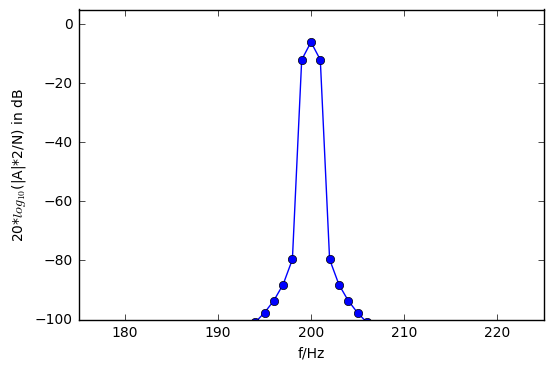

In [316]:
window_and_dft(y1,w_hanning)

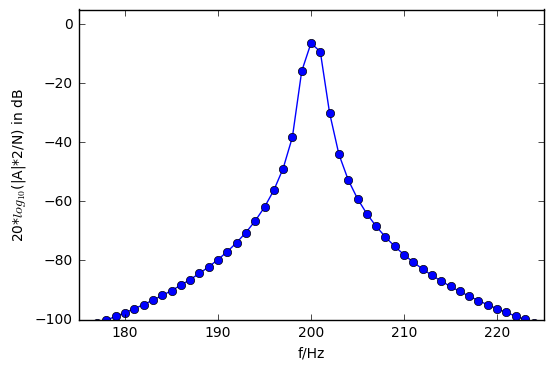

In [317]:
window_and_dft(y2,w_hanning)

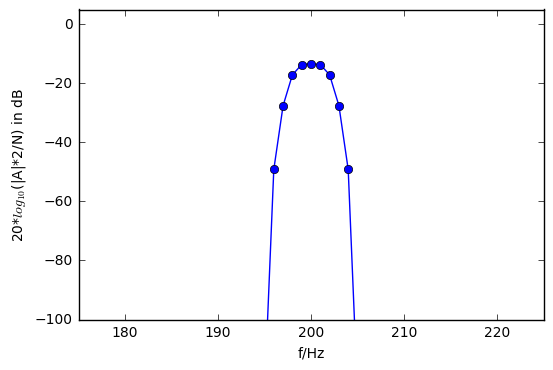

In [318]:
window_and_dft(y1,w_flat_top)

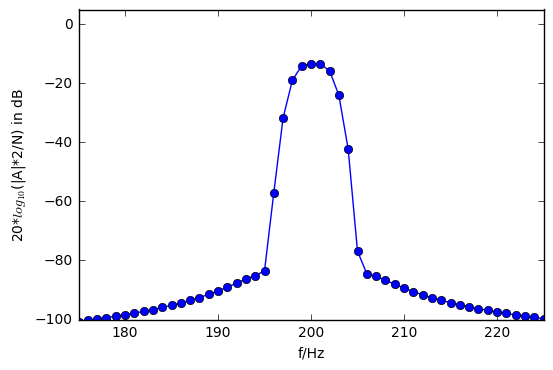

In [319]:
window_and_dft(y2,w_flat_top)

e) Plot the amplitude spectra of the three windows in dB normalised to their maximum. Use
zero-padding or the formulas for interpolation towards the DTFT to achieve a suficiently
high resolution of the spectra to show the characteristics of the windows.

In [320]:
#we define this in a function
def amplitude_spectra_Zero_padding(w):
    #The zero Padding is missing and the results look shitty
    #We use zero padding so that we add some interpolated points to the Windwo so we can see the characteristics better
    N = len(w)
    M = 2*N  # length of zero-padded signal (We simply double the lenght which should be sufficient)
    
    #zero-padding
    w_padded = np.concatenate((w, np.zeros(M-N)))
    
    #dtft
    W = np.fft.fft(w_padded,M) 
    W = np.fft.fftshift(W)
    W = W / np.amax(W) + np.nextafter(0,1)
    mu = np.linspace(-np.pi, np.pi, M, endpoint=False) #no endpoint it moves the spectrum otherwise
    
    Wlog=20*np.log10(np.abs(W))

    #...and its spectrum
    plt.figure()
    plt.plot(mu, Wlog)#, 'bo-')
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$| W(e^{j \Omega}) |$ in dB')
    #plt.axis([-np.pi, np.pi, -100, 5])
    plt.axis([-np.pi/30, np.pi/30, -80, 5]) #we should use pi and -pi here but the results look like shit
    plt.grid()
    


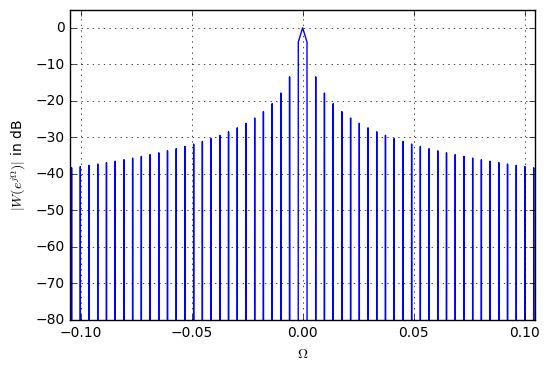

In [321]:
amplitude_spectra_Zero_padding(w_rect)

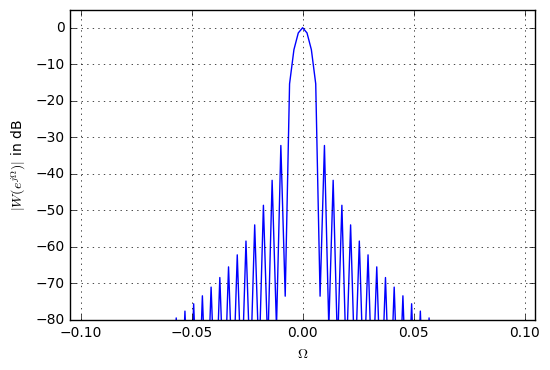

In [322]:
amplitude_spectra_Zero_padding(w_hanning)

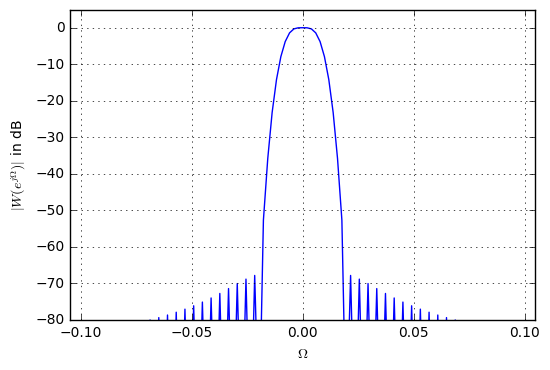

In [323]:
amplitude_spectra_Zero_padding(w_flat_top)

f) Interpret the results of d) with the help of e) regarding the best and worst case for the
different windows. Why do the results for the signals with frequencies $f_1$ and $f_2$ differ?

In [324]:
#we define a function for DFT plot of the Signals
def dft_signal(f):
    
    N = len(f)

    # DFT of window function 
    F = np.fft.fft(f, N)
   
    #normalisation with  2/N
    Flog = 20*np.log10( np.abs(F)*(2/N))
    
    plt.stem(Flog, bottom=-200)
    plt.axis([175, 225, -100, 5])
    plt.ylabel(r'20*$log_{10}$(|A|*2/N) in dB')
    plt.xlabel(r'f/Hz')


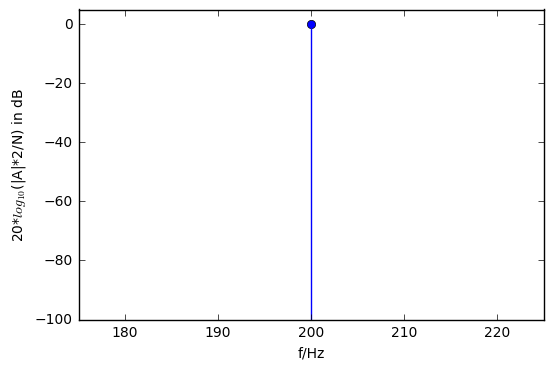

In [325]:
dft_signal(y1)

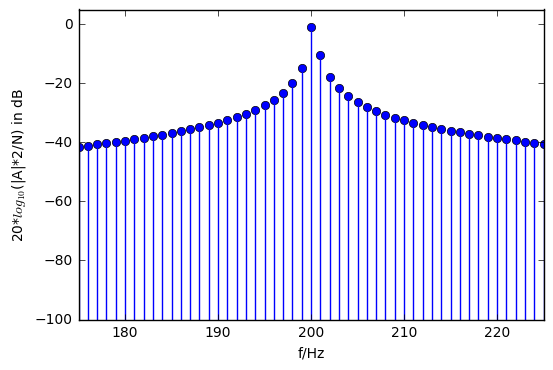

In [326]:
dft_signal(y2)

The above Figures show the spectra of our 2 Input Signals. We observe, that $y_1$ shows a perfect dirac at its center frequency. This is due to the fact, that we sample with an integer multiple of its frequency. <br />
However $y_2$ propagates at $200.25$ Hz which is not an integer multiple of our sampling frequency. This is why we have multiple dirac Impulses in the spectre. <br />
As windowing is just a multiplication in time domain, it's a convolution in frequency domain. Following this insight the output spectres of d) for the first signal $y_1$ are just shifted version of the windows-spectres. <br />
For the second signal we get multiple shifted, weighted and added versions of the window spectre. <br />
Since the shown windows have different properties concerning the width of the main lope and the the decrease of the side lopes their use is extremely application specific. <br />
For Example they have various capabilities concerning the suppression or distinguishability of neighbouring signals. This ability comes in hand with the different properties of the main- and side lopes. The best and worst cases are to be rated with respect to this properties and the specific demands of the problem.

g) Determine the width of the main lobe (at the $−3$ dB corner frequencies) and the attenuation of the highest side lobe from the window spectra. It might be useful to use wvtool
in Matlab.

h) Explain for which signal analysis task the rectangular window and the flat top window
should be used.

i) Do some research on your own: Which advantages exhibit the Kaiser-bessel (in Matlab:
kaiser ) and the Dolph-Chebyshev (in Matlab: chebwin ) window?